In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
df=pd.read_csv("kc_house_data_NaN.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(columns=['id', 'Unnamed: 0'], axis=1, inplace=True, errors='ignore')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Here we can see the missing values for bedrooms and bathrooms

In [6]:
print("no of NaN values for bedroom cols: ",df["bedrooms"].isnull().sum())
print("no of NaN values for bathroom cols: ",df["bathrooms"].isnull().sum())

no of NaN values for bedroom cols:  13
no of NaN values for bathroom cols:  10


In [7]:
# replacing missing values with mean
m1=df["bedrooms"].mean()
m2=df["bathrooms"].mean()
df["bedrooms"].replace(np.nan,m1, inplace=True)
df["bathrooms"].replace(np.nan,m2, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_27060\1398823633.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].replace(np.nan,m1, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_27060\1398823633.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [8]:
print("no of NaN values for bedroom cols: ",df["bedrooms"].isnull().sum())
print("no of NaN values for bathroom cols: ",df["bathrooms"].isnull().sum())

no of NaN values for bedroom cols:  0
no of NaN values for bathroom cols:  0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [10]:
floor_counts= df['floors'].value_counts().to_frame()
floor_counts.columns=['house_count']
floor_counts 

,house_count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


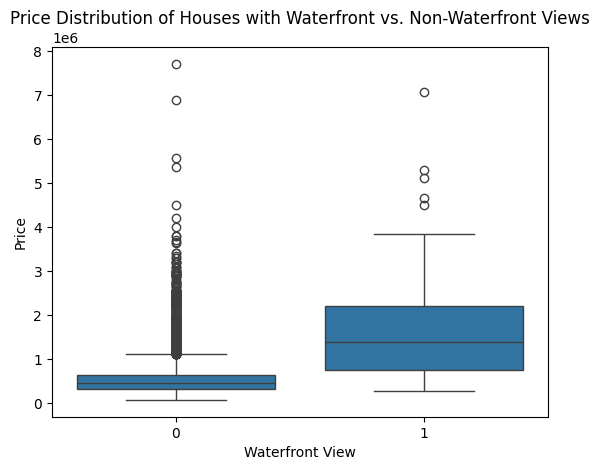

In [11]:

sns.boxplot(x='waterfront', y='price', data=df)

# Set labels and title
plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.title("Price Distribution of Houses with Waterfront vs. Non-Waterfront Views")
plt.show()

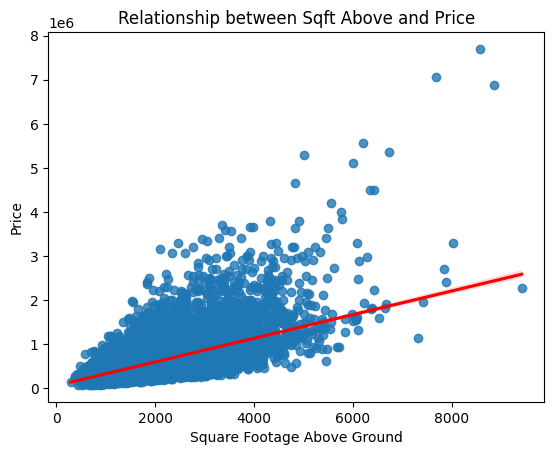

In [12]:
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.xlabel("Square Footage Above Ground")
plt.ylabel("Price")
plt.title("Relationship between Sqft Above and Price")
plt.show()

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [13]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Module 4: Model Development
We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [14]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [15]:
X=df[["sqft_living"]]
Y=df["price"]
lm=LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [16]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df["price"]

lm = LinearRegression()
lm.fit(X, y)
lm.predict(X) 
r2 = lm.score(X, y)

print(lm.predict(X))
print("R^2 value:", r2)

[283270.39007442 662572.30128732 306267.5845512  ... 304248.5512992
 428758.8034324  304046.65336969]
R^2 value: 0.6576951666037498


In [17]:
Input = [
	('scale', StandardScaler()),
	('polynomial', PolynomialFeatures(include_bias=False)),
	('model', LinearRegression())
]

In [18]:

X = df[features]
y = df["price"]

pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

pipeline.fit(X, y)
r2 = pipeline.score(X, y)
print("R^2 value:", r2)

R^2 value: 0.7513408515988734


Module 5: Model Evaluation and Refinement

In [19]:
# Fix import errors and syntax
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [21]:
from sklearn.linear_model import Ridge

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df["price"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)

r2_test = ridge_model.score(x_test, y_test)
print("R^2 on test data:", r2_test)

R^2 on test data: 0.6478759163939111


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Second order polynomial transform
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Ridge regression with alpha=0.1
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)

r2_poly_test = ridge_poly.score(x_test_poly, y_test)
print("R^2 on test data with polynomial features:", r2_poly_test)

R^2 on test data with polynomial features: 0.7002744282602154
